Dataset Statistics: RNA Sequence Length Distributions

In [3]:
"""
Compute RNA sequence length statistics for multiple datasets.

This script reads RNA sequences from FASTA files and extracts
sequence length distributions for downstream dataset statistics
and visualization (e.g., for Nature-style figures).
"""

import os
import pandas as pd
from Bio import SeqIO


def get_sequence_lengths(fasta_path: str):
    """
    Extract RNA sequence lengths from a FASTA file.

    Parameters
    ----------
    fasta_path : str
        Path to the FASTA file containing RNA sequences.

    Returns
    -------
    list[int]
        A list of sequence lengths.
    """
    lengths = []
    for record in SeqIO.parse(fasta_path, "fasta"):
        lengths.append(len(record.seq))
    return lengths


# =========================
# Input FASTA files
# =========================
datasets = {
    "Dataset1": "../datasets/dataset1/dataset1.fasta",
    "Dataset2": "../datasets/dataset2/dataset2.fasta",
    "Dataset3": "../datasets/dataset3/dataset3.fasta",
}

# =========================
# Collect length statistics
# =========================
records = []

for dataset_name, fasta_path in datasets.items():
    lengths = get_sequence_lengths(fasta_path)
    for length in lengths:
        records.append(
            {
                "dataset": dataset_name,
                "length": length
            }
        )

# Convert to DataFrame
length_df = pd.DataFrame(records)

# =========================
# Basic sanity check
# =========================
print(length_df.groupby("dataset")["length"].describe())

# Optional: save statistics for reproducibility
os.makedirs("../results/dataset_statistics/", exist_ok=True)
length_df.to_csv(
    "../results/dataset_statistics/rna_length_distribution.csv",
    index=False
)


          count       mean        std   min   25%   50%     75%    max
dataset                                                               
Dataset1   17.0  70.352941  24.057071  37.0  55.0  68.0   72.00  134.0
Dataset2   16.0  98.875000  67.954764  17.0  56.0  79.0  114.75  277.0
Dataset3   17.0  85.705882  20.046087  68.0  74.0  77.0   93.00  133.0


Visualize RNA Sequence Length Distributions

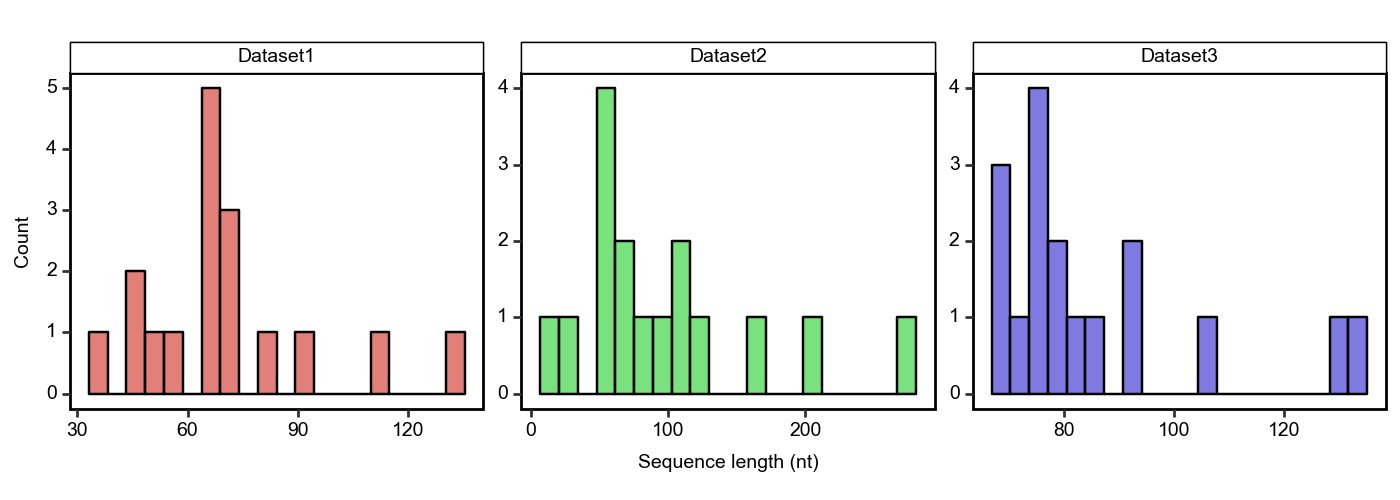

/home/wuyou/miniconda3/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 2.5 in image.
/home/wuyou/miniconda3/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../figures/dataset_sequence_length_distribution.pdf


Saved figure to: ../figures/dataset_sequence_length_distribution.pdf


In [5]:
"""
Dataset Statistics: RNA Sequence Length Distributions (Faceted Histogram)

This script visualizes RNA sequence length distributions across datasets
using faceted histograms (one panel per dataset), suitable for
Nature-style supplementary figures.
"""

import os
import pandas as pd
from plotnine import (
    ggplot, aes, geom_histogram, facet_wrap,
    theme, element_text, element_rect, element_line,
    element_blank, xlab, ylab
)

# -------------------------
# Input: long-format dataframe
# Expected columns: ["dataset", "length"]
# Example: length_df = pd.read_csv("results/dataset_statistics/rna_length_distribution.csv")
# -------------------------
# If you already have `length_df` in memory, you can skip the next line.
# length_df = pd.read_csv("../results/dataset_statistics/rna_length_distribution.csv")

# Sanity checks (helpful for reproducibility)
required_cols = {"dataset", "length"}
if not required_cols.issubset(length_df.columns):
    raise ValueError(f"`length_df` must contain columns: {required_cols}")

length_df = length_df.copy()
length_df["dataset"] = length_df["dataset"].astype("category")
length_df["length"] = pd.to_numeric(length_df["length"], errors="coerce")
length_df = length_df.dropna(subset=["length"])

# -------------------------
# Plot
# -------------------------
p1 = (
    ggplot(length_df, aes(x="length", fill="dataset"))
    + geom_histogram(bins=20, alpha=0.8, color="black")
    + facet_wrap("~dataset", nrow=1, scales="free")  # each dataset in its own panel
    + xlab("Sequence length (nt)")
    + ylab("Count")
    + theme(
        figure_size=(7, 2.5),

        # Panel styling
        panel_background=element_rect(fill="white"),
        panel_border=element_rect(color="black", size=1),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),

        # Axis text
        axis_text=element_text(size=7, family="Arial", color="black"),
        axis_title_x=element_text(size=7, family="Arial", color="black"),
        axis_title_y=element_text(size=7, family="Arial", color="black"),

        # Facet strip styling
        strip_text=element_text(size=7, family="Arial", color="black"),
        strip_background=element_rect(fill="white", color="black", size=0.5),

        # Legend off by default (since facets already encode dataset)
        legend_position="none",
    )
)

# Display (optional)
print(p1)
#p1.show()

# -------------------------
# Save
# -------------------------
out_path = "../figures/dataset_sequence_length_distribution.pdf"
os.makedirs(os.path.dirname(out_path), exist_ok=True)
p1.save(out_path)
print(f"Saved figure to: {out_path}")


Visualize resulotion distribution

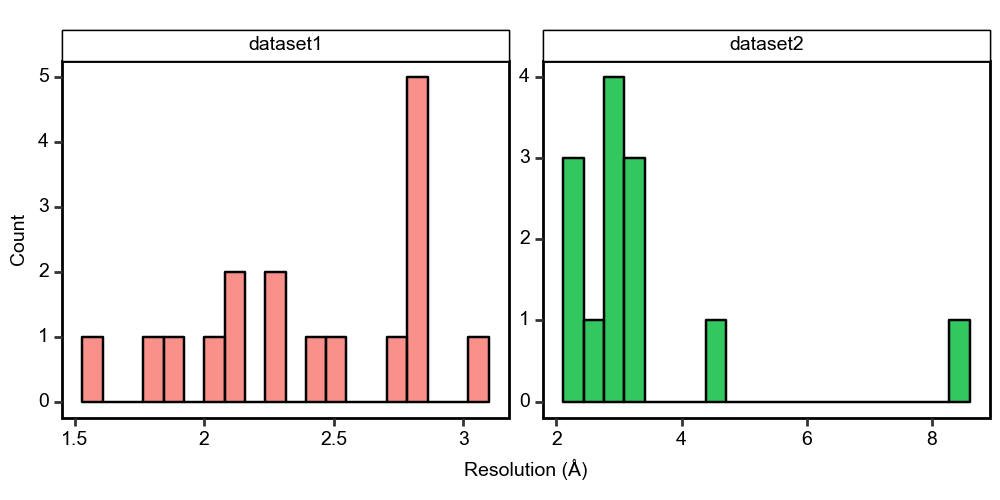

/home/wuyou/miniconda3/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 2.5 in image.
/home/wuyou/miniconda3/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../figures/dataset_resolution_distribution.pdf


Saved figure to: ../figures/dataset_resolution_distribution.pdf


In [6]:
"""
Dataset Statistics: Experimental Resolution Distributions

This script visualizes the distribution of experimental resolutions (Å)
for RNA structures across multiple datasets using faceted histograms.
"""

import os
import pandas as pd
from plotnine import (
    ggplot, aes, geom_histogram, facet_wrap,
    theme, element_text, element_rect, element_blank,
    xlab, ylab, scale_fill_manual
)

# -------------------------
# Input: resolution lists
# -------------------------
dataset1_resolution = [
    2.74, 2.53, 2.09, 1.77, 2.15, 3.04, 2.85, 2.43,
    2.79, 2.30, 1.55, 2.83, 1.91, 2.30, 2.06, 2.81, 2.80
]
dataset2_resolution = [
    2.90, 3.33, 2.90, 8.57, 2.43, 2.90, 4.60,
    2.76, 3.37, 3.20, 3.02, 2.43, 2.40
]

# Define consistent dataset colors (optional)
fill_colors = {"dataset1": "#F8766D", "dataset2": "#00BA38"}

# -------------------------
# Build long-format dataframe
# -------------------------
df = pd.DataFrame({
    "resolution": dataset1_resolution + dataset2_resolution,
    "dataset": (["dataset1"] * len(dataset1_resolution)
                + ["dataset2"] * len(dataset2_resolution))
})
df["dataset"] = df["dataset"].astype("category")

# -------------------------
# Plot
# -------------------------
p1 = (
    ggplot(df, aes(x="resolution", fill="dataset"))
    + geom_histogram(bins=20, alpha=0.8, color="black")
    + facet_wrap("~dataset", nrow=1, scales="free")
    + xlab("Resolution (Å)")
    + ylab("Count")
    + scale_fill_manual(values=fill_colors)
    + theme(
        figure_size=(5, 2.5),

        panel_background=element_rect(fill="white"),
        panel_border=element_rect(color="black", size=1),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),

        axis_text=element_text(size=7, family="Arial", color="black"),
        axis_title_x=element_text(size=7, family="Arial", color="black"),
        axis_title_y=element_text(size=7, family="Arial", color="black"),

        strip_text=element_text(size=7, family="Arial", color="black"),
        strip_background=element_rect(fill="white", color="black", size=0.5),

        # With faceting, legend is usually redundant; turn on if needed.
        legend_position="none",
    )
)

print(p1)

# -------------------------
# Save
# -------------------------
out_path = "../figures/dataset_resolution_distribution.pdf"
os.makedirs(os.path.dirname(out_path), exist_ok=True)
p1.save(out_path)
print(f"Saved figure to: {out_path}")
